In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
# Load the CSV files
electricity_prices = pd.read_csv('C:/Users/volco/AdvancedBA/Data/Day-ahead Prices.csv')
load_data = pd.read_csv('C:/Users/volco/AdvancedBA/Data/load.csv')

In [8]:

# Parse timestamps for day-ahead prices
electricity_prices['MTU'] = pd.to_datetime(electricity_prices['MTU (CET/CEST)'].str[:16], format='%d.%m.%Y %H:%M')
electricity_prices.drop(columns=['MTU (CET/CEST)', 'Currency', 'BZN|DE-LU'], inplace=True)

# Parse timestamps for load data
load_data['Time'] = pd.to_datetime(load_data['Time (CET/CEST)'].str[:16], format='%d.%m.%Y %H:%M')
load_data.drop(columns=['Time (CET/CEST)'], inplace=True)

# Check for missing values in both datasets
day_ahead_prices_missing_values = electricity_prices.isnull().sum()
load_missing_values = load_data.isnull().sum()

(day_ahead_prices_missing_values, load_missing_values)

# Set datetime columns as the index for interpolation
electricity_prices.set_index('MTU', inplace=True)
load_data.set_index('Time', inplace=True)

# Perform time-based interpolation
electricity_prices = electricity_prices.interpolate(method='time')
load_data = load_data.interpolate(method='time')

# Check for missing values again
day_ahead_prices_missing_values = electricity_prices.isnull().sum()
load_missing_values = load_data.isnull().sum()

day_ahead_prices_hourly = electricity_prices.resample('H').mean()
load_hourly = load_data.resample('H').sum()

# Check the first few rows of the resampled data
day_ahead_prices_hourly_head = day_ahead_prices_hourly.head()
load_hourly_head = load_hourly.head()

(day_ahead_prices_missing_values, load_missing_values, day_ahead_prices_hourly_head, load_hourly_head)


(Day-ahead Price [EUR/MWh]    0
 dtype: int64,
 Day-ahead Total Load Forecast [MW] - BZN|DE-LU    0
 Actual Total Load [MW] - BZN|DE-LU                0
 dtype: int64,
                      Day-ahead Price [EUR/MWh]
 MTU                                           
 2023-01-01 00:00:00                    -3.7300
 2023-01-01 01:00:00                   -15.7500
 2023-01-01 02:00:00                   -29.9325
 2023-01-01 03:00:00                   -29.9325
 2023-01-01 04:00:00                   -29.9250,
                      Day-ahead Total Load Forecast [MW] - BZN|DE-LU  \
 Time                                                                  
 2023-01-01 00:00:00                                        168862.0   
 2023-01-01 01:00:00                                        160107.0   
 2023-01-01 02:00:00                                        154525.0   
 2023-01-01 03:00:00                                        150354.0   
 2023-01-01 04:00:00                                        150

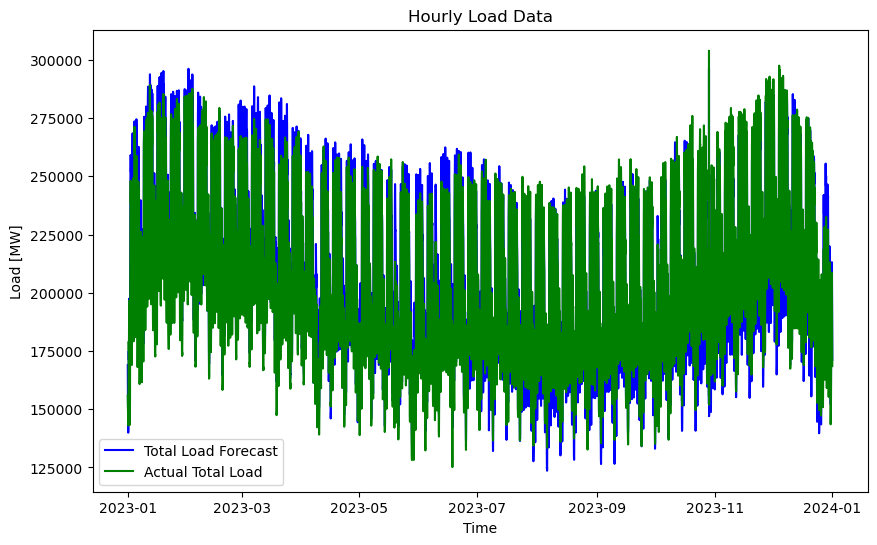

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(load_hourly['Day-ahead Total Load Forecast [MW] - BZN|DE-LU'], label='Total Load Forecast', color='blue')
plt.plot(load_hourly['Actual Total Load [MW] - BZN|DE-LU'], label='Actual Total Load', color='green')
plt.title('Hourly Load Data')
plt.xlabel('Time')
plt.ylabel('Load [MW]')
plt.legend()
plt.show()


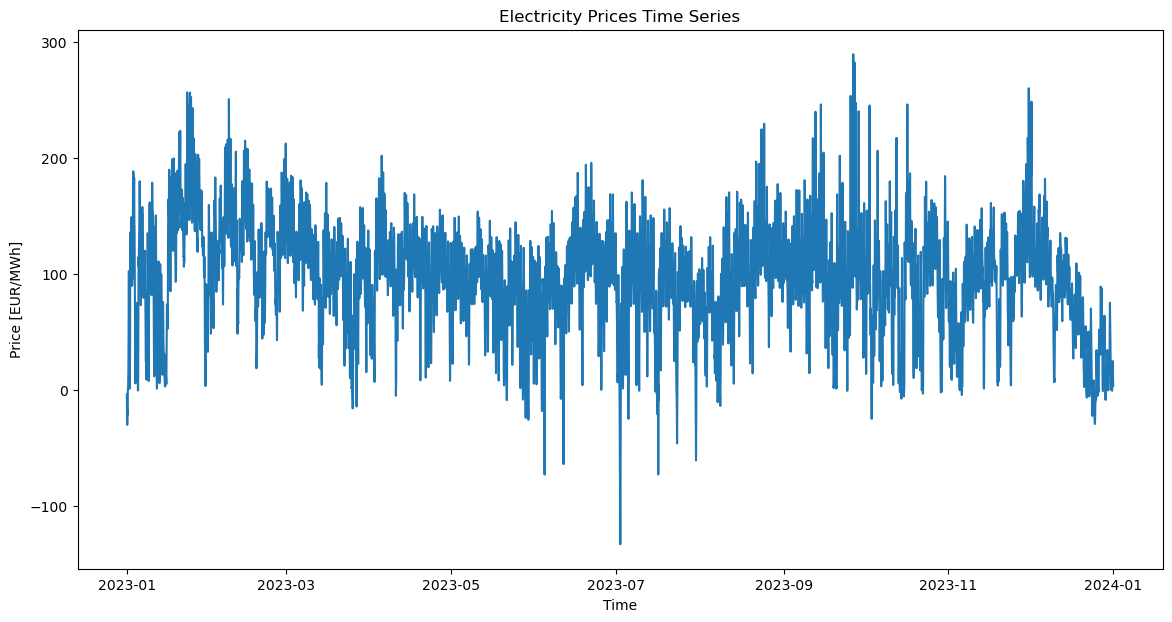

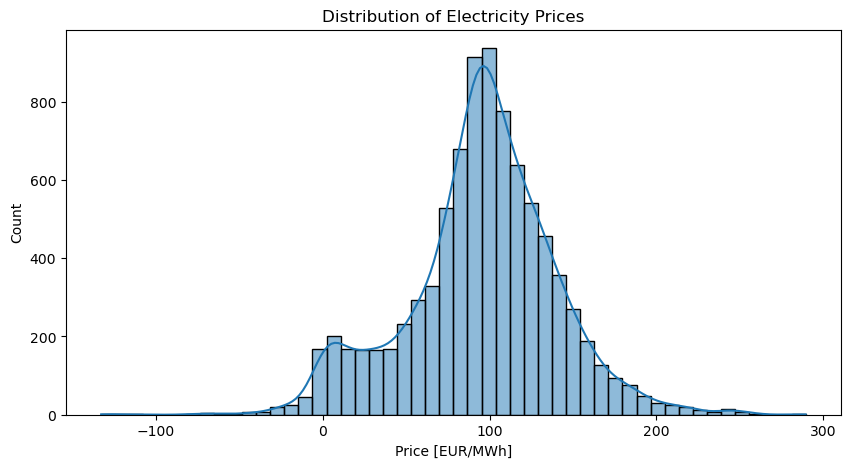

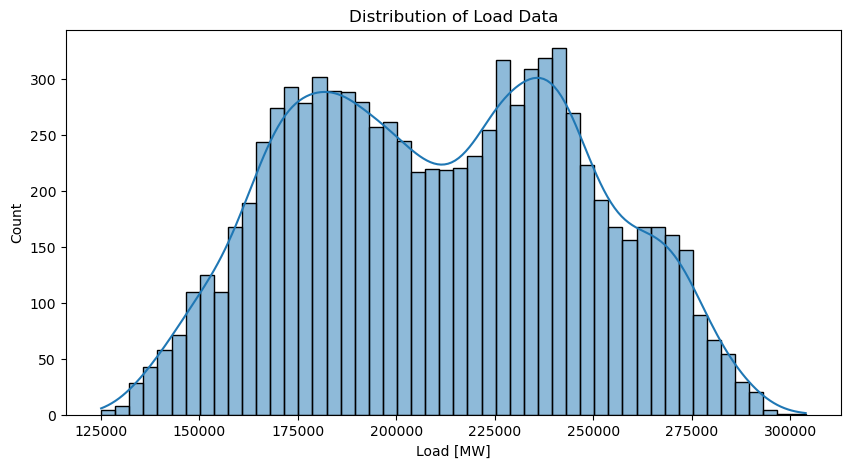

In [10]:
# Time series plot for electricity prices
plt.figure(figsize=(14, 7))
plt.plot(day_ahead_prices_hourly.index, day_ahead_prices_hourly['Day-ahead Price [EUR/MWh]'])
plt.title('Electricity Prices Time Series')
plt.xlabel('Time')
plt.ylabel('Price [EUR/MWh]')
plt.show()

# Distribution of electricity prices
plt.figure(figsize=(10, 5))
sns.histplot(day_ahead_prices_hourly['Day-ahead Price [EUR/MWh]'], bins=50, kde=True)
plt.title('Distribution of Electricity Prices')
plt.xlabel('Price [EUR/MWh]')
plt.show()

# Distribution of load data
plt.figure(figsize=(10, 5))
sns.histplot(load_hourly['Actual Total Load [MW] - BZN|DE-LU'], bins=50, kde=True)
plt.title('Distribution of Load Data')
plt.xlabel('Load [MW]')
plt.show()

In [ ]:
import gym
from gym import spaces

class BatteryOptimizationEnv(gym.Env):

    def __init__(self, electricity_prices, battery_state_info, household_consumption):
        super(BatteryOptimizationEnv, self).__init__()
        
        # Define action and observation space
        self.action_space = spaces.Discrete(3)  # Charge, Discharge, Do Nothing
        self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)
        
        # Store the data
        self.electricity_prices = electricity_prices
        self.battery_state_info = battery_state_info
        self.household_consumption = household_consumption
        
        # Initialize state
        self.current_step = 0
        self.done = False
        self.info = {}
    
    def step(self, action):
        # define how the action affects the state and reward
        # This is where you'll also implement the logic for charging, discharging, and so on
        
        reward = self._get_reward(action)
        self.current_step += 1
        
        if self.current_step >= len(self.electricity_prices):
            self.done = True
        
        self._update_state(action)
        
        return self._get_observation(), reward, self.done, self.info
    
    def reset(self):
        # Reset the state of the environment to an initial state
        self.current_step = 0
        self.done = False
        self._reset_battery_state()
        
        return self._get_observation()
    
    def render(self, mode='human'):
        # Render the environment to the screen
        pass  # For simplicity, we're not implementing a visualization
    
    def _get_observation(self):
        # Get the observation, which could be a combination of current electricity prices,
        # battery state, and household consumption
        pass
    
    def _get_reward(self, action):
        # Define how to calculate the reward
        pass
    
    def _update_state(self, action):
        # Update the battery's state based on the action taken
        pass
    
    def _reset_battery_state(self):
        # Reset the battery to a default state
        pass

# You would then create your environment and agent, and train your agent with something like:

# env = BatteryOptimizationEnv(electricity_prices, battery_state_info, household_consumption)
# agent = YourRLAgent(env)

# while not done:
#     action = agent.act(observation)
#     observation, reward, done, info = env.step(action)
#     agent.learn()
